# North vs South: A Portuguese (vege)tale

### Introduction: 

### First Analysis


Tourism in Portugal serves millions of international and domestic tourists. Tourists visit to see cities, historic landmarks, enjoy beaches, or religious sites. In 2017, Portugal had 23 million visitors. The most popular destinations were Lisbon, Porto, Fatima, the Portuguese Riviera and the Algarve. This project aims to explore the differences between Lisboa and Porto, the two biggest Portuguese cities. In 2018 these two cities had more tourists than London or Barcelona and have had an incredible growth over the past years. During this project I expect to explore the different neighborhoods in both cities, compare and contrast them and see why they are so popular among tourists. 

This project can also be the first step to a new business to decide where to step foot. In which city there is a wider market to explore. The aim of this project is to answer the question: Where is the best city to open a new Vegetarian Restaurant, Lisboa or Porto? If we want to open it in Lisboa, what is the best neighborhood for it.

For this project Foursquare data will be used for both cities and in the end a cluster analysis will be made to compare different neighborhoods in Lisbon. *k*-means clustering algorithm will be used to complete this task. Finally, I will use the Folium library to visualize the neighborhoods in Lisbon and their emerging clusters. An exploratory analysis of the type of restaurants in both cities will be made, to explore where is best to open a new vegetarian restaurant. 

### Data

Based on this problem, the factors that will influence my decission are as follows:
(Same analysis will be done for Lisboa and Porto)
* number of existing restaurants in the neighborhood (any type of restaurant)
* number of Vegetarian restaurants in the neighborhood, if any
* distance of neighborhood from city center

Our neighbourhoods will be defined starting from each city center. 

Data sources needed to extract the information to be used in the analysis:
* number of restaurants and their type and location in every neighbourhood will be obtained using **Foursquare API**
* The lisbon neighbourhoods will be extracted from a dataset available in **Kaggle** from airbnb dataset. I've downloaded that dataset and I'll use just to extract lisbon's neighbourhoods and their geocoordinates.


## First Analysis: Lisboa and Porto

Let's create latitude & longitude coordinates for centroids of our candidate neighborhoods (Lisboa and Porto). A radius of 10 km from the center can be used.



In [439]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#for better reading of the html
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


#### Obtain Lisbon and Porto coordinares using geolocator

In [440]:
address_lisbon = 'Lisbon'
address_porto = 'Porto'

geolocator = Nominatim(user_agent="lis_explorer")
location_lis = geolocator.geocode(address_lisbon)
latitude_lis = location_lis.latitude
longitude_lis = location_lis.longitude
print('The geograpical coordinates of Lisboa are {}, {}.'.format(latitude_lis, longitude_lis))
location_por = geolocator.geocode(address_porto)
latitude_por = location_por.latitude
longitude_por = location_por.longitude
print('The geograpical coordinates of Porto are {}, {}.'.format(latitude_por, longitude_por))

The geograpical coordinates of Lisboa are 38.7077507, -9.1365919.
The geograpical coordinates of Porto are 41.1494512, -8.6107884.


#### Create a map with folium of Lisbon and Porto

In [441]:
#Create a map of lisbon
map_lis = folium.Map(location=[latitude_lis, longitude_lis], zoom_start=12)

In [442]:
map_por = folium.Map(location=[latitude_por, longitude_por], zoom_start=12)


### Foursquare analysis
#### Credentials

In [443]:
CLIENT_ID = '1AGG1LICK4B1RFVU1QORSNQDW3PSKDMDSYIPQLQA1BZCCWR0' # my Foursquare ID
CLIENT_SECRET = 'UNEZ3L1NSFAIQCE4Q2PZHGONRQUMQX0UFGZKAREJYUEWYSTJ' # my Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 1AGG1LICK4B1RFVU1QORSNQDW3PSKDMDSYIPQLQA1BZCCWR0
CLIENT_SECRET: UNEZ3L1NSFAIQCE4Q2PZHGONRQUMQX0UFGZKAREJYUEWYSTJ


Now that I have my credentials I will search for a query of "health" around both Lisbon and Porto. This health query will return venues related with the well being such as gyms, ioga centers and healty restaurants in which our vegetarian will be included. 

In [444]:
search_query = 'Restaurant'
radius = 6000
LIMIT = 1000
print(search_query + ' .... OK!')

        

Restaurant .... OK!


In [445]:
url_por = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_por, longitude_por, VERSION, search_query, radius, LIMIT)
url_por
            
porto = requests.get(url_por).json()
porto

{'meta': {'code': 200, 'requestId': '5cd3547b4c1f6743e2f56be9'},
 'response': {'venues': [{'id': '4e25d87cfa76a490d3bedca7',
    'name': 'Restaurante Palco',
    'location': {'address': 'Hotel Teatro',
     'crossStreet': 'R. Sá da Bandeira, 84',
     'lat': 41.14687478040585,
     'lng': -8.609192317548931,
     'labeledLatLngs': [{'label': 'display',
       'lat': 41.14687478040585,
       'lng': -8.609192317548931}],
     'distance': 316,
     'postalCode': '4000-427',
     'cc': 'PT',
     'city': 'Porto',
     'state': 'Porto',
     'country': 'Portugal',
     'formattedAddress': ['Hotel Teatro (R. Sá da Bandeira, 84)',
      '4000-427 Porto',
      'Portugal']},
    'categories': [{'id': '4bf58dd8d48988d1c0941735',
      'name': 'Mediterranean Restaurant',
      'pluralName': 'Mediterranean Restaurants',
      'shortName': 'Mediterranean',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/mediterranean_',
       'suffix': '.png'},
      'primary': True}],
    

#### Lisboa



In [446]:
url_lis = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_lis, longitude_lis, VERSION, search_query, radius, LIMIT)
url_lis
            
lisboa = requests.get(url_lis).json()
lisboa

{'meta': {'code': 200, 'requestId': '5cd3547d6a6071212894d502'},
 'response': {'venues': [{'id': '579cfba6498e327383b2681e',
    'name': 'The Vintage Restaurant',
    'location': {'lat': 38.720173,
     'lng': -9.150393,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.720173,
       'lng': -9.150393}],
     'distance': 1830,
     'cc': 'PT',
     'country': 'Portugal',
     'formattedAddress': ['Portugal']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1557353597',
    'hasPerk': False},
   {'id': '4c33927ced37a59354946d03',
    'name': 'Restaurante Santiago',
    'location': {'address': 'Rua das portas de Santo Antão',
     'lat': 38.71585463729462,
     'lng': -9.14024713277309,
     'labeledLatLngs': [{'label': 'display',
       '

Lets transform the json from Foursquare into a pandas dataframe for better analysis

In [447]:

# tranform venues into a dataframe
df_lis = pd.DataFrame.from_dict(json_normalize(lisboa["response"]["venues"]))
df_lis.head()



,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,579cfba6498e327383b2681e,NaN,PT,NaN,Portugal,NaN,1830,[Portugal],"[{'label': 'display', 'lat': 38.720173, 'lng':...",38.720173,-9.150393,NaN,NaN,NaN,The Vintage Restaurant,v-1557353597,NaN
1,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",False,4c33927ced37a59354946d03,Rua das portas de Santo Antão,PT,Lisboa,Portugal,NaN,956,"[Rua das portas de Santo Antão, Lisboa, Portugal]","[{'label': 'display', 'lat': 38.71585463729462...",38.715855,-9.140247,NaN,NaN,Lisboa,Restaurante Santiago,v-1557353597,NaN
2,"[{'id': '4def73e84765ae376e57713a', 'name': 'P...",False,54e49918498e9832a2ca3a43,"Av. da Liberdade, 29A",PT,Lisboa,Portugal,NaN,1183,"[Av. da Liberdade, 29A, 1250-139 Lisboa, Portu...","[{'label': 'display', 'lat': 38.71698180306306...",38.716982,-9.143361,NaN,1250-139,Lisboa,Tabik Restaurant,v-1557353597,NaN
3,"[{'id': '4def73e84765ae376e57713a', 'name': 'P...",False,50db3fc5e4b0f03135a987b0,NaN,PT,Lisboa,Portugal,NaN,588,"[1200-049 Lisboa, Portugal]","[{'label': 'display', 'lat': 38.71186802264142...",38.711868,-9.140849,NaN,1200-049,Lisboa,Carmo Restaurant & Bar,v-1557353597,NaN
4,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",False,5594f63d498eb0983735e742,"Av. da Liberdade, 180B",PT,Lisboa,Portugal,NaN,1580,"[Av. da Liberdade, 180B, 1250-146 Lisboa, Port...","[{'label': 'display', 'lat': 38.720447, 'lng':...",38.720447,-9.144728,NaN,1250-146,Lisboa,Restaurante NH Liberdade,v-1557353597,NaN


In [448]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_lis['categories'] = df_lis.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_lis.columns = [column.split('.')[-1] for column in df_lis.columns]

df_lis.head()

,categories,hasPerk,id,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,name,referralId,id
0,Hotel,False,579cfba6498e327383b2681e,NaN,PT,NaN,Portugal,NaN,1830,[Portugal],"[{'label': 'display', 'lat': 38.720173, 'lng':...",38.720173,-9.150393,NaN,NaN,NaN,The Vintage Restaurant,v-1557353597,NaN
1,Seafood Restaurant,False,4c33927ced37a59354946d03,Rua das portas de Santo Antão,PT,Lisboa,Portugal,NaN,956,"[Rua das portas de Santo Antão, Lisboa, Portugal]","[{'label': 'display', 'lat': 38.71585463729462...",38.715855,-9.140247,NaN,NaN,Lisboa,Restaurante Santiago,v-1557353597,NaN
2,Portuguese Restaurant,False,54e49918498e9832a2ca3a43,"Av. da Liberdade, 29A",PT,Lisboa,Portugal,NaN,1183,"[Av. da Liberdade, 29A, 1250-139 Lisboa, Portu...","[{'label': 'display', 'lat': 38.71698180306306...",38.716982,-9.143361,NaN,1250-139,Lisboa,Tabik Restaurant,v-1557353597,NaN
3,Portuguese Restaurant,False,50db3fc5e4b0f03135a987b0,NaN,PT,Lisboa,Portugal,NaN,588,"[1200-049 Lisboa, Portugal]","[{'label': 'display', 'lat': 38.71186802264142...",38.711868,-9.140849,NaN,1200-049,Lisboa,Carmo Restaurant & Bar,v-1557353597,NaN
4,Breakfast Spot,False,5594f63d498eb0983735e742,"Av. da Liberdade, 180B",PT,Lisboa,Portugal,NaN,1580,"[Av. da Liberdade, 180B, 1250-146 Lisboa, Port...","[{'label': 'display', 'lat': 38.720447, 'lng':...",38.720447,-9.144728,NaN,1250-146,Lisboa,Restaurante NH Liberdade,v-1557353597,NaN


#### Porto

Lets transform the json from Foursquare into a pandas dataframe for better analysis

In [449]:

# tranform venues into a dataframe
df_por = pd.DataFrame.from_dict(json_normalize(porto["response"]["venues"]))

# filter the category for each row
df_por['categories'] = df_por.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_por.columns = [column.split('.')[-1] for column in df_por.columns]

df_por.head()



,categories,hasPerk,id,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,name,referralId,id
0,Mediterranean Restaurant,False,4e25d87cfa76a490d3bedca7,Hotel Teatro,PT,Porto,Portugal,"R. Sá da Bandeira, 84",316,"[Hotel Teatro (R. Sá da Bandeira, 84), 4000-42...","[{'label': 'display', 'lat': 41.14687478040585...",41.146875,-8.609192,4000-427,Porto,Restaurante Palco,v-1557353595,NaN
1,Bar,False,4f079457e4b0e89079b49c50,"Campo Dos Martires Da Patria, 135",PT,Porto,Portugal,NaN,629,"[Campo Dos Martires Da Patria, 135, Porto, Por...","[{'label': 'display', 'lat': 41.14494304840898...",41.144943,-8.615329,NaN,Porto,Restaurant Churrasqueira Brazil Cafeteria,v-1557353595,NaN
2,Restaurant,False,5180225fe4b0bcff8027d259,Rua Gonçalo Cristóvão n.198,PT,Porto,Portugal,NaN,538,"[Rua Gonçalo Cristóvão n.198, 4000-265 Porto, ...","[{'label': 'display', 'lat': 41.15396594917156...",41.153966,-8.608496,4000-265,Porto,The Lingerie Restaurant,v-1557353595,NaN
3,Portuguese Restaurant,False,4e875c3d823125560f36e947,"R. de Serralves, 124",PT,Porto,Portugal,NaN,3235,"[R. de Serralves, 124, 4150-702 Porto, Portugal]","[{'label': 'display', 'lat': 41.15423655186200...",41.154237,-8.648863,4150-702,Porto,Jardim d'Inverno Restaurant,v-1557353595,NaN
4,Portuguese Restaurant,False,4bd37e77a8b3a5939d296a5f,Rua Fonte Taurina 83,PT,Porto,Portugal,NaN,1038,"[Rua Fonte Taurina 83, 4050 Porto, Portugal]","[{'label': 'display', 'lat': 41.14046409116731...",41.140464,-8.614131,4050,Porto,Ora Viva Restaurant,v-1557353595,NaN


#### Analysis

With my "Restaurant" venues, I am going to explore how many venues of each category

Lisbon

In [450]:
### Lets explore the categories and count - 

counts_lis = df_lis.groupby('categories')['name'].nunique()
counts_lis

categories
African Restaurant          2
Asian Restaurant            2
BBQ Joint                   1
Breakfast Spot              1
Cocktail Bar                1
Himalayan Restaurant        2
Hotel                       1
Indian Restaurant           2
Italian Restaurant          1
Japanese Restaurant         1
Mexican Restaurant          1
Pakistani Restaurant        1
Portuguese Restaurant      20
Restaurant                 11
Seafood Restaurant          1
South Indian Restaurant     1
Steakhouse                  1
Name: name, dtype: int64

Porto

In [451]:
counts_por = df_por.groupby('categories')['name'].nunique()
counts_por

categories
Afghan Restaurant            1
Asian Restaurant             1
Bar                          1
Chinese Restaurant           1
Gastropub                    1
Italian Restaurant           1
Mediterranean Restaurant     1
Portuguese Restaurant       28
Restaurant                  10
Seafood Restaurant           1
Tapas Restaurant             2
Turkish Restaurant           2
Name: name, dtype: int64

#### Visualization

Lisbon

In [452]:
### Lets visualize the health venues in the map of Lisbon
venues_map_lis = folium.Map(location=[latitude_lis, longitude_lis], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Health Places as blue circle markers
for lat, lng, label in zip(df_lis.lat, df_lis.lng, df_lis.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_lis)

# display map
venues_map_lis

Porto

In [453]:
### Lets visualize the health venues in the map of Porto
venues_map_por = folium.Map(location=[latitude_por, longitude_por], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Health Places as blue circle markers
for lat, lng, label in zip(df_por.lat, df_por.lng, df_por.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_por)

# display map
venues_map_por

### Second Analysis: Lisbon Neighbourhoods

In [454]:
### Download the dataset from desktop

neigh = pd.read_csv("~/Desktop/projects/Final_Assignment/tomslee_airbnb_lisbon_0107_2015-03-18.csv") 

neigh.head(2)


,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,3880,4970,Entire home/apt,NaN,Misericórdia,70,4.5,3.0,1.0,70.0,1.0,38.711013,-9.148237,2015-03-19 07:27:18.801
1,6499,14455,Entire home/apt,NaN,Belém,3,5.0,2.0,1.0,68.0,2.0,38.696747,-9.198404,2015-03-19 08:37:56.575


In [455]:
neigh = neigh[['neighborhood','latitude','longitude']].drop_duplicates('neighborhood')
neigh

,neighborhood,latitude,longitude
0,Misericórdia,38.711013,-9.148237
1,Belém,38.696747,-9.198404
3,Santa Maria Maior,38.711671,-9.126964
4,Avenidas Novas,38.730747,-9.148240
6,Areeiro,38.736341,-9.137916
7,São Vicente,38.715136,-9.122788
9,Estrela,38.711955,-9.158766
10,Alcântara,38.701456,-9.191033
12,Alvalade,38.748635,-9.149022
15,Campo de Ourique,38.721431,-9.163592


#### Use the function from the CClabs to explore all the neighbours in Lisboa

In [456]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [457]:
### use the previous dataset and the function to check Lisboa's venues
LIMIT= 1000

Lisb_venues = getNearbyVenues(names=neigh['neighborhood'],
                                   latitudes=neigh['latitude'],
                                   longitudes=neigh['longitude']
                                  )

Misericórdia
Belém
Santa Maria Maior
Avenidas Novas
Areeiro
São Vicente
Estrela
Alcântara
Alvalade
Campo de Ourique
Penha de França
Santo António
Olivais
Arroios
Lumiar
Parque das Nações
São Domingos de Benfica
Beato
Benfica
Campolide
Ajuda
Carnide
Marvila
Santa Clara


In [458]:
Lisb_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Misericórdia,38.711013,-9.148237,Park,38.711194,-9.147778,Lounge
1,Misericórdia,38.711013,-9.148237,Miradouro de Santa Catarina (Adamastor),38.709467,-9.147659,Scenic Lookout
2,Misericórdia,38.711013,-9.148237,The Mill,38.710871,-9.149789,Coffee Shop
3,Misericórdia,38.711013,-9.148237,Taberna Portuguesa,38.711053,-9.148131,Portuguese Restaurant
4,Misericórdia,38.711013,-9.148237,Fumeiro de Santa Catarina,38.709996,-9.149220,Portuguese Restaurant


In [459]:
counts_lis = Lisb_venues.groupby('Venue Category')['Venue'].nunique()
counts_lis

Venue Category
African Restaurant                2
Art Gallery                       5
Arts & Crafts Store               3
Asian Restaurant                  5
Athletics & Sports                1
Australian Restaurant             1
Auto Garage                       2
BBQ Joint                        11
Bakery                           18
Bar                              29
Bed & Breakfast                   9
Beer Bar                          1
Big Box Store                     1
Bistro                            5
Boarding House                    1
Boat or Ferry                     1
Bookstore                         3
Botanical Garden                  1
Boutique                          1
Brazilian Restaurant              7
Breakfast Spot                    8
Brewery                           2
Burger Joint                     15
Burrito Place                     1
Cafeteria                         1
Café                             67
Campground                        1
Capitol Build

In [460]:
### Filter dataset by "restaurant"
Lisb_rest = Lisb_venues[Lisb_venues['Venue Category'].str.contains("Restaurant")]
counts_rest = Lisb_rest.groupby('Venue Category')['Venue'].nunique()
counts_rest

Venue Category
African Restaurant                2
Asian Restaurant                  5
Australian Restaurant             1
Brazilian Restaurant              7
Chinese Restaurant                4
Comfort Food Restaurant           2
Dim Sum Restaurant                4
Falafel Restaurant                1
Fast Food Restaurant              3
French Restaurant                 2
Greek Restaurant                  2
Indian Restaurant                14
Italian Restaurant               19
Japanese Restaurant               5
Mediterranean Restaurant         16
Mexican Restaurant                1
Middle Eastern Restaurant         4
Modern European Restaurant        1
Portuguese Restaurant            99
Ramen Restaurant                  1
Restaurant                       65
Seafood Restaurant               17
Sushi Restaurant                 13
Swiss Restaurant                  1
Tapas Restaurant                  8
Thai Restaurant                   2
Tibetan Restaurant                1
Vegetarian / 

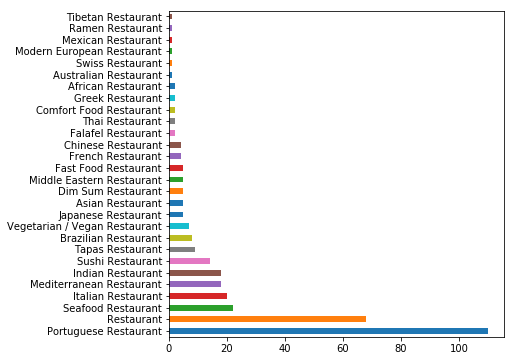

In [461]:
Lisb_rest['Venue Category'].value_counts().plot(kind='barh',figsize=(6,6))

In [462]:
### Group by neighbourhood
Lisb_rest.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Ajuda,2,2,2,2,2,2
Alcântara,6,6,6,6,6,6
Alvalade,15,15,15,15,15,15
Areeiro,18,18,18,18,18,18
Arroios,25,25,25,25,25,25
Avenidas Novas,28,28,28,28,28,28
Beato,4,4,4,4,4,4
Belém,23,23,23,23,23,23
Benfica,3,3,3,3,3,3


#### Lets analyse each neighbourhood

In [463]:
# one hot encoding
Lisb_onehot = pd.get_dummies(Lisb_rest[['Venue Category']], prefix="", prefix_sep="")

# add Neighbourhood column back to dataframe
Lisb_onehot['Neighbourhood'] = Lisb_rest['Neighbourhood'] 

# move Neighbourhood column to the first column
fixed_columns = [Lisb_onehot.columns[-1]] + list(Lisb_onehot.columns[:-1])
Lisb_onehot = Lisb_onehot[fixed_columns]

Lisb_onehot.head()

,Neighbourhood,African Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
3,Misericórdia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Misericórdia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,Misericórdia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,Misericórdia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,Misericórdia,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [464]:
## Group neighbourhoods by the frequency of each venue
Lisb_grouped =Lisb_onehot.groupby('Neighbourhood').mean().reset_index()
Lisb_grouped

,Neighbourhood,African Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant
0,Ajuda,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Alcântara,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alvalade,0.000000,0.000000,0.0000,0.000000,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.266667,0.000000,0.400000,0.000000,0.066667,0.000000,0.066667,0.000000,0.000000,0.000000
3,Areeiro,0.000000,0.000000,0.0000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.111111,0.055556,0.000000,0.055556,0.000000,0.055556,0.000000,0.277778,0.000000,0.222222,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000
4,Arroios,0.000000,0.040000,0.0000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.080000,0.000000,0.000000,0.000000,0.080000,0.000000,0.240000,0.000000,0.120000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
5,Avenidas Novas,0.000000,0.035714,0.0000,0.071429,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.035714,0.071429,0.000000,0.000000,0.000000,0.214286,0.000000,0.285714,0.000000,0.071429,0.000000,0.000000,0.035714,0.000000,0.000000
6,Beato,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Belém,0.000000,0.000000,0.0000,0.000000,0.043478,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.043478,0.130435,0.000000,0.000000,0.000000,0.434783,0.000000,0.173913,0.043478,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000
8,Benfica,0.000000,0.000000,0.0000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Campo de Ourique,0.000000,0.000000,0.0000,0.066667,0.000000,0.000000,0.066667,0.033333,0.066667,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.166667,0.166667,0.100000,0.000000,0.033333,0.000000,0.000000,0.000000


In [465]:
#### print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in Lisb_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Lisb_grouped[Lisb_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ajuda----
                venue  freq
0          Restaurant   1.0
1  African Restaurant   0.0
2    Asian Restaurant   0.0
3  Tibetan Restaurant   0.0
4     Thai Restaurant   0.0


----Alcântara----
                      venue  freq
0                Restaurant  0.33
1     Portuguese Restaurant  0.33
2  Mediterranean Restaurant  0.17
3        Seafood Restaurant  0.17
4          Asian Restaurant  0.00


----Alvalade----
                      venue  freq
0                Restaurant  0.40
1     Portuguese Restaurant  0.27
2        Chinese Restaurant  0.13
3  Mediterranean Restaurant  0.07
4          Tapas Restaurant  0.07


----Areeiro----
                       venue  freq
0      Portuguese Restaurant  0.28
1                 Restaurant  0.22
2          Indian Restaurant  0.11
3   Mediterranean Restaurant  0.06
4  Middle Eastern Restaurant  0.06


----Arroios----
                       venue  freq
0          Indian Restaurant  0.24
1      Portuguese Restaurant  0.24
2         Seafood Re

In [466]:
### Use the function from the cclabs to order the most common venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [467]:
#Top 10 venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Lisb_grouped['Neighbourhood']

for ind in np.arange(Lisb_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Lisb_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ajuda,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
1,Alcântara,Restaurant,Portuguese Restaurant,Seafood Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant
2,Alvalade,Restaurant,Portuguese Restaurant,Chinese Restaurant,Tapas Restaurant,Sushi Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Greek Restaurant,Asian Restaurant,Australian Restaurant
3,Areeiro,Portuguese Restaurant,Restaurant,Indian Restaurant,Italian Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Greek Restaurant,Seafood Restaurant,Brazilian Restaurant,Tapas Restaurant
4,Arroios,Indian Restaurant,Portuguese Restaurant,Seafood Restaurant,Restaurant,Italian Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Asian Restaurant,Greek Restaurant
5,Avenidas Novas,Restaurant,Portuguese Restaurant,Italian Restaurant,Sushi Restaurant,Brazilian Restaurant,Mediterranean Restaurant,Japanese Restaurant,Thai Restaurant,Asian Restaurant,Dim Sum Restaurant
6,Beato,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
7,Belém,Portuguese Restaurant,Restaurant,Mediterranean Restaurant,Japanese Restaurant,Thai Restaurant,Seafood Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant
8,Benfica,Seafood Restaurant,Comfort Food Restaurant,Portuguese Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Dim Sum Restaurant
9,Campo de Ourique,Portuguese Restaurant,Seafood Restaurant,Restaurant,Sushi Restaurant,Brazilian Restaurant,Italian Restaurant,Fast Food Restaurant,Dim Sum Restaurant,Falafel Restaurant,French Restaurant


### Cluster Neighborhoods Analysis

Run *k*-means to cluster the neighborhood into 5 clusters.

#### Optimal number of clusters: Elbow method

In [468]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Lis_cluster)
    Sum_of_squared_distances.append(km.inertia_)
    
    

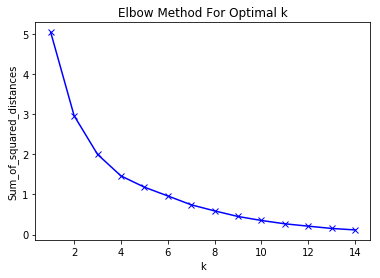

In [469]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Let's choose the optimal k as the closer to an elbow, between 2 and 4 or between 6 and 8 so, I'll choose first k=7 as the optimal number of clusters. 

In [470]:
# set number of clusters - lets start with 4 clusters
kclusters = 7

Lis_cluster = Lisb_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Lis_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 0, 3, 3, 0, 1, 3, 4, 0], dtype=int32)

In [471]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [472]:
# merge Lisb_grouped with Lisb_venues data to add latitude/longitude for each neighborhood
Lisb_merged = Lisb_rest.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

Lisb_merged.head() 

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Misericórdia,38.711013,-9.148237,Taberna Portuguesa,38.711053,-9.148131,Portuguese Restaurant,3,Portuguese Restaurant,Restaurant,Seafood Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Mediterranean Restaurant
4,Misericórdia,38.711013,-9.148237,Fumeiro de Santa Catarina,38.709996,-9.149220,Portuguese Restaurant,3,Portuguese Restaurant,Restaurant,Seafood Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Mediterranean Restaurant
6,Misericórdia,38.711013,-9.148237,Zapata,38.710506,-9.150380,Portuguese Restaurant,3,Portuguese Restaurant,Restaurant,Seafood Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Mediterranean Restaurant
7,Misericórdia,38.711013,-9.148237,Madame Petisca,38.709724,-9.148173,Portuguese Restaurant,3,Portuguese Restaurant,Restaurant,Seafood Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Mediterranean Restaurant
8,Misericórdia,38.711013,-9.148237,La Piadina,38.710902,-9.146067,Italian Restaurant,3,Portuguese Restaurant,Restaurant,Seafood Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Swiss Restaurant,Tapas Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Mediterranean Restaurant


### Visualization

In [473]:
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

print(rainbow)



['#8000ff', '#2c7ef7', '#2adddd', '#80ffb4', '#d4dd80', '#ff7e41', '#ff0000']


In [474]:
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Lisb_merged['Neighbourhood Latitude'], Lisb_merged['Neighbourhood Longitude'], Lisb_merged['Neighbourhood'], Lisb_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_lis)
    

map_lis
       

### Analysis of Clusters

In [475]:
## 0 cluster

cluster0 = Lisb_merged.loc[Lisb_merged['Cluster Labels'] == 0, Lisb_merged.columns[[1] + list(range(5, Lisb_merged.shape[1]))]]
cluster0.head()

cluster1 = Lisb_merged.loc[Lisb_merged['Cluster Labels'] == 1, Lisb_merged.columns[[1] + list(range(5, Lisb_merged.shape[1]))]]

cluster2 = Lisb_merged.loc[Lisb_merged['Cluster Labels'] == 2, Lisb_merged.columns[[1] + list(range(5, Lisb_merged.shape[1]))]]

cluster3 = Lisb_merged.loc[Lisb_merged['Cluster Labels'] == 3, Lisb_merged.columns[[1] + list(range(5, Lisb_merged.shape[1]))]]



In [476]:
## 1st cluster
Lisb_merged.loc[Lisb_merged['Cluster Labels'] == 1, Lisb_merged.columns[[1] + list(range(5, Lisb_merged.shape[1]))]]



,Neighbourhood Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
872,38.729351,-9.106432,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
873,38.729351,-9.107754,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
875,38.729351,-9.112924,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
876,38.729351,-9.112595,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
937,38.703309,-9.199349,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
941,38.703309,-9.201975,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant
977,38.744554,-9.112530,Restaurant,1,Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Dim Sum Restaurant,Falafel Restaurant


In [477]:
counts_clusters= Lisb_merged.groupby(["Venue Category", "Cluster Labels"]).size().reset_index(name="Time")
counts_clusters.sort_values(by=['Cluster Labels', 'Time'], inplace=True, ascending=False)
counts_clusters

,Venue Category,Cluster Labels,Time
36,Portuguese Restaurant,6,36
29,Mediterranean Restaurant,6,7
42,Restaurant,6,3
52,Tapas Restaurant,6,3
7,Brazilian Restaurant,6,1
11,Comfort Food Restaurant,6,1
47,Seafood Restaurant,6,1
58,Vegetarian / Vegan Restaurant,6,1
3,Asian Restaurant,5,1
16,Fast Food Restaurant,5,1


/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


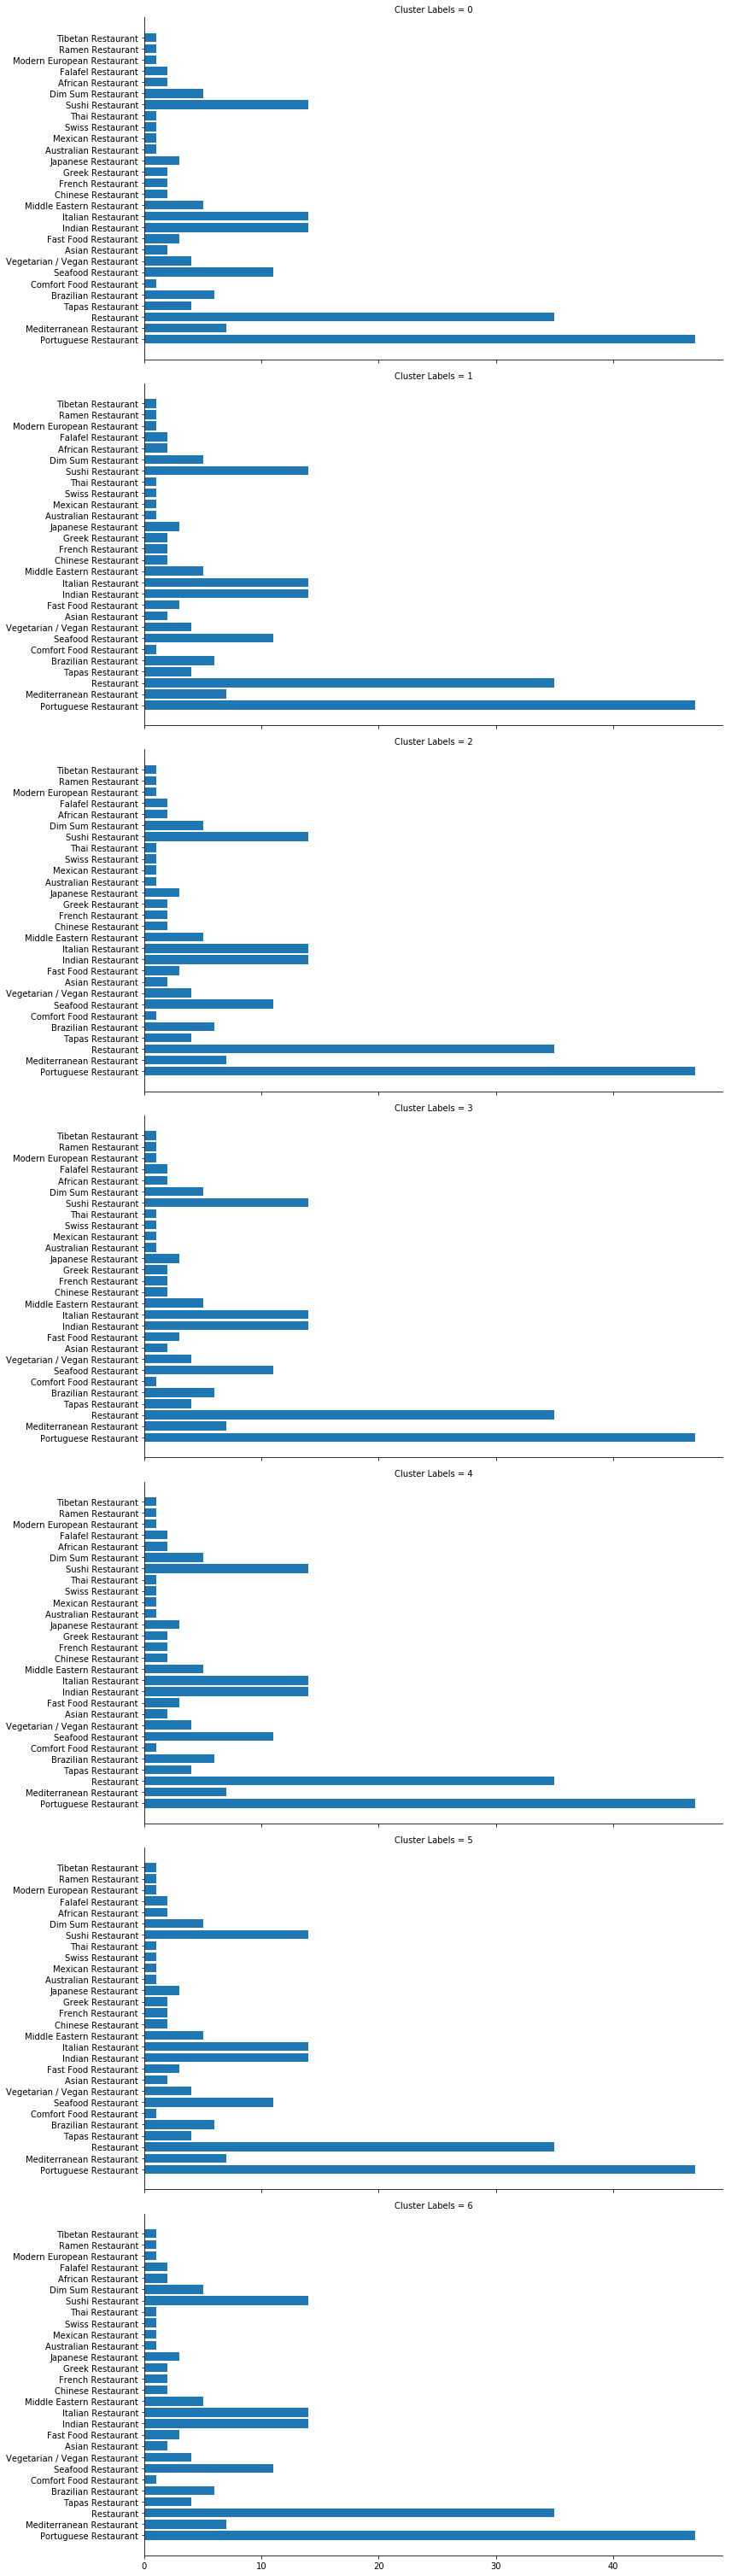

In [478]:
import seaborn as sns

ax = sns.FacetGrid(counts_clusters, row='Cluster Labels', height=3, size=6, aspect=2)
ax.map(plt.barh, y=counts_clusters["Venue Category"], width=counts_clusters["Time"])
#ax.set_xticklabels(rotation=90)
#ax = sns.barplot(x=counts_clusters["Venue Category"], y=counts_clusters["Time"], hue=counts_clusters["Cluster Labels"], data=counts_clusters)
#plt.setp(ax.get_xticklabels(), rotation=90)



### Conclusions

As we can see from the first analysis, both Lisbon and Porto have few "health" venues and all of them are in different categories. The initial problem for this exploratory analysis was to investigate in which city was best to open a vegetarian restaurant. According to these results it is obvious that this type of restaurant is not very common on both cities, therefore both of them are good candidates to open a vegetarian restaurant. The best place to open a new restaurant should be around some of these "health" venues such as gyms or health centers.

When focusing our analysis on Lisbon city and its neighbourhoods there are 7 vegetarian restaurants spread accross the city. After the clustering analysis on the Restaurants dataset it can be concluded that vegetarian restaurants are devided between clusters 0, 6 and the majority on 3.  